In [19]:
import numpy as np
import pandas as pd

In [20]:
df=pd.read_csv('lstm_data/moving_turnright.csv', usecols=['time','accX', 'accY', 'accZ', 'accResultant', 'gyrX', 'gyrY', 'gyrZ', 'tiltLeft', 'tiltRight', 'isFall'])
# df = pd.read_csv('data.csv', )

In [21]:
df.head(20)

,time,accX,accY,accZ,accResultant,gyrX,gyrY,gyrZ,tiltLeft,tiltRight,isFall
0,2022-10-28 09:54:40.894,-0.03,0.04,1.08,1.09,-14.96,-2.91,-13.61,0.0,1.0,0.0
1,2022-10-28 09:54:40.973,-0.02,0.03,1.10,1.10,-21.84,-7.23,-10.17,0.0,1.0,0.0
2,2022-10-28 09:54:41.019,-0.02,0.03,1.10,1.10,-23.29,-9.78,-6.98,0.0,1.0,0.0
3,2022-10-28 09:54:41.081,-0.03,0.02,1.10,1.11,-18.69,-12.22,-0.40,0.0,1.0,0.0
4,2022-10-28 09:54:41.208,-0.13,-0.01,1.12,1.13,-12.14,-14.72,4.77,0.0,1.0,0.0
5,2022-10-28 09:54:41.334,-0.04,-0.05,1.23,1.24,0.25,1.90,14.39,0.0,1.0,0.0
6,2022-10-28 09:54:41.397,0.10,-0.07,1.19,1.19,4.03,32.30,27.22,0.0,1.0,0.0
7,2022-10-28 09:54:41.569,0.06,0.03,1.13,1.13,-16.90,15.93,27.30,0.0,1.0,0.0
8,2022-10-28 09:54:41.662,0.06,0.08,1.19,1.19,-15.86,3.37,3.82,0.0,1.0,0.0
9,2022-10-28 09:54:41.725,-0.04,0.07,1.20,1.20,1.69,2.62,-8.97,0.0,1.0,0.0


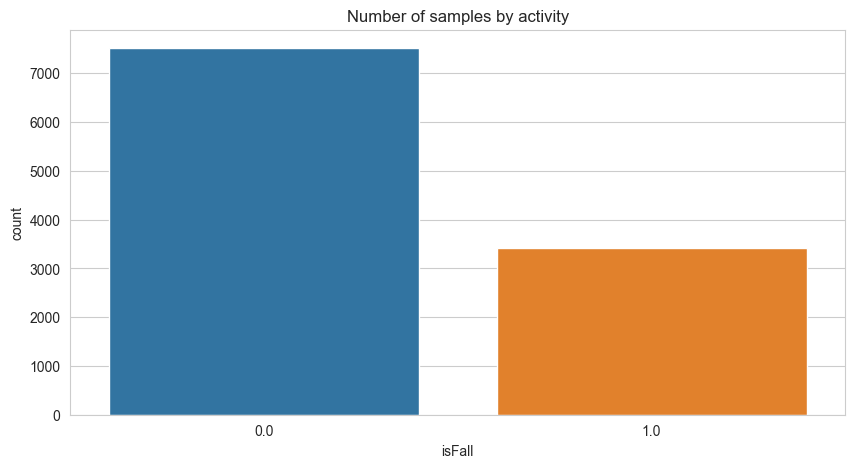

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = "isFall", data = df)
plt.title("Number of samples by activity")
plt.show()

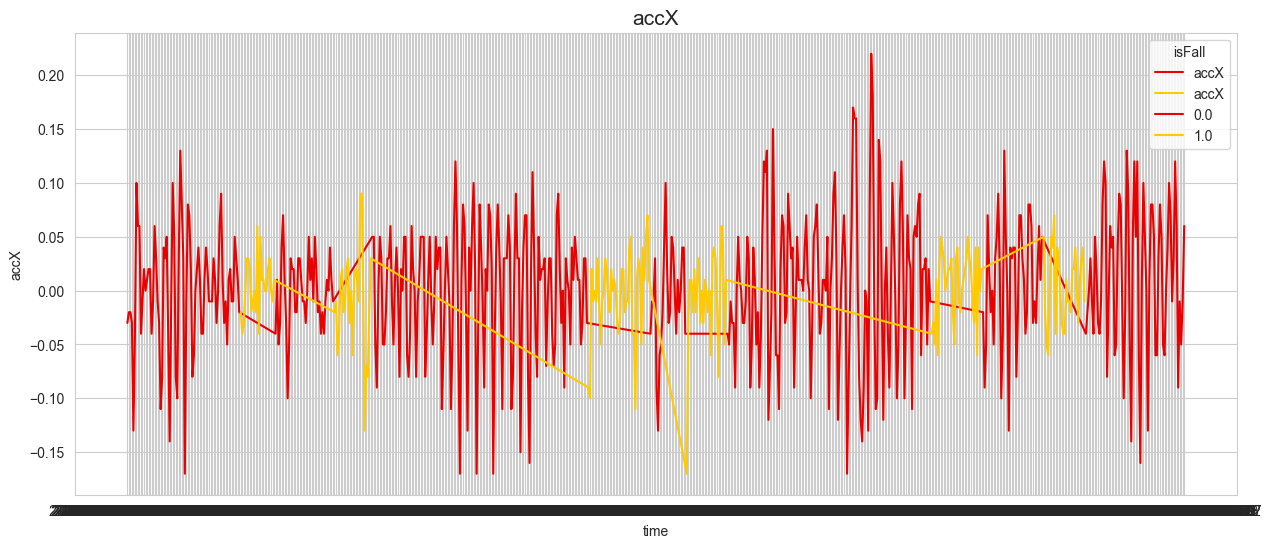

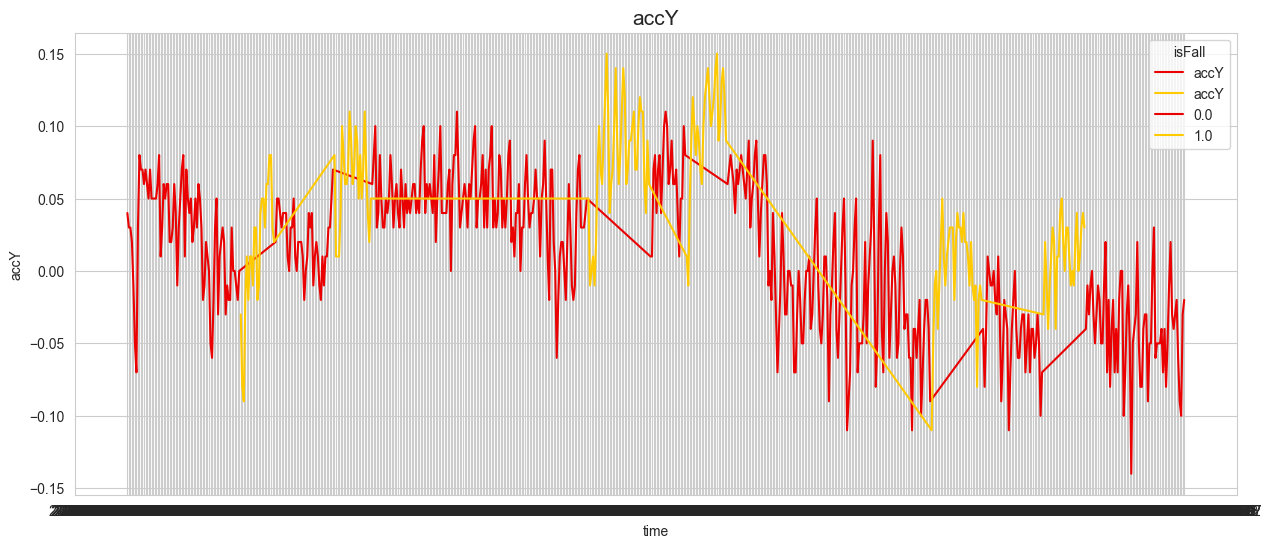

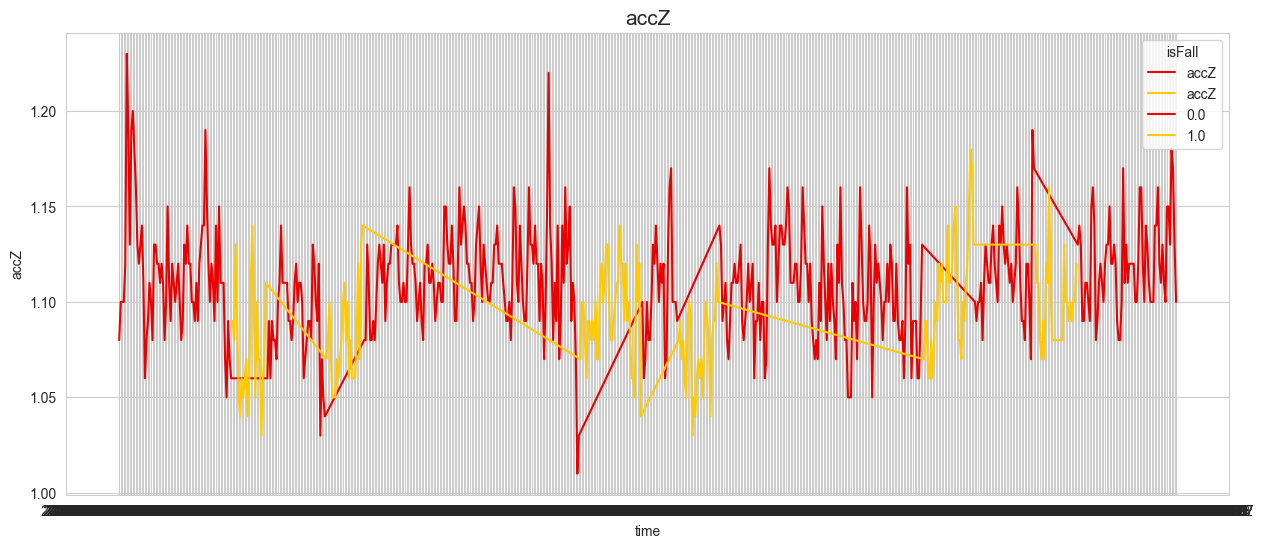

In [29]:
for metric in ['accX', 'accY', 'accZ']:
    data = df[:700]
    # data = data[data['isFall'] == i]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = metric, x = 'time', data = data, color='r', label=metric, hue = 'isFall', palette = 'hot')
    plt.ylabel(metric)
    plt.title(metric, fontsize = 15)
    plt.show()

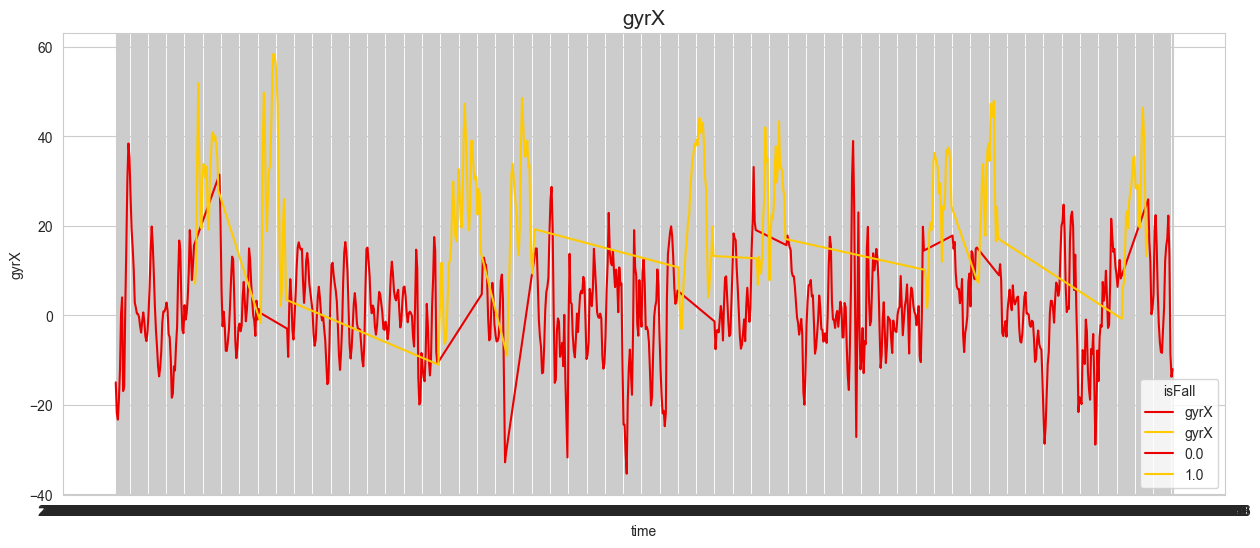

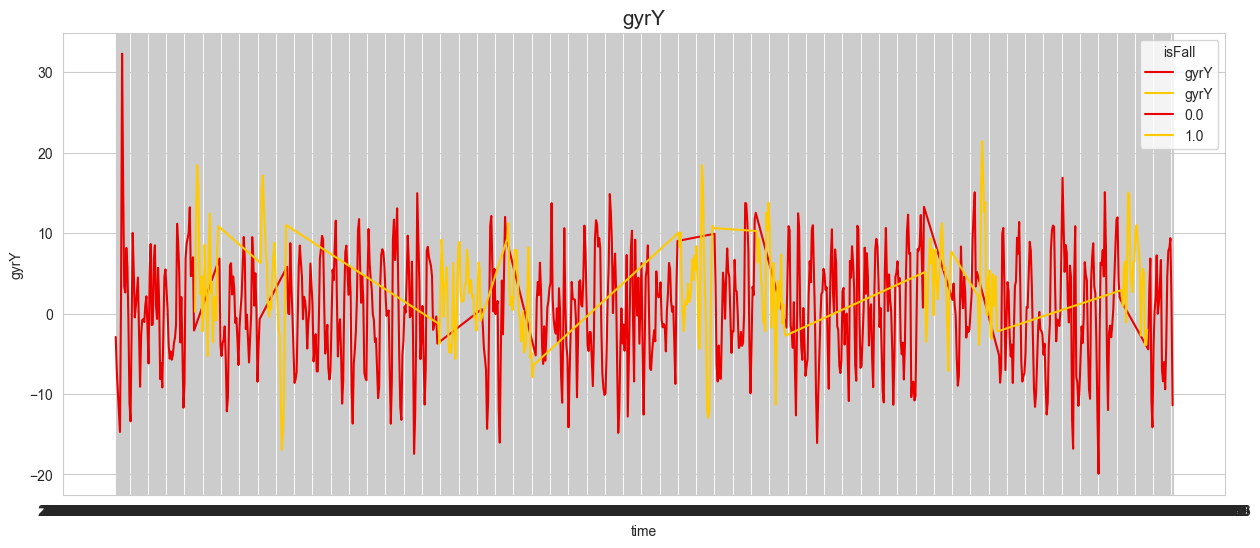

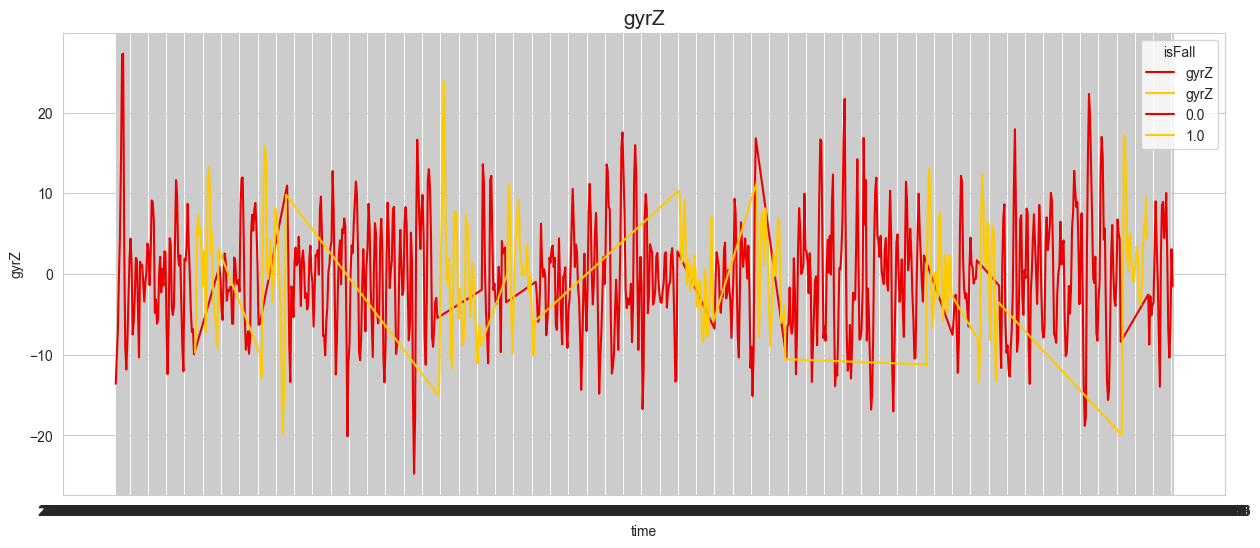

In [31]:
for metric in ['gyrX', 'gyrY', 'gyrZ']:
    data = df[:1000]
    # data = data[data['isFall'] == i]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = metric, x = 'time', data = data, color='r', label=metric, hue = 'isFall', palette = 'hot')
    plt.ylabel(metric)
    plt.title(metric, fontsize = 15)
    plt.show()

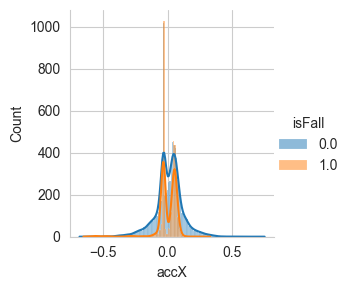

In [15]:
sns.FacetGrid(df, hue = 'isFall').map(sns.histplot, 'accX', kde=True).add_legend()

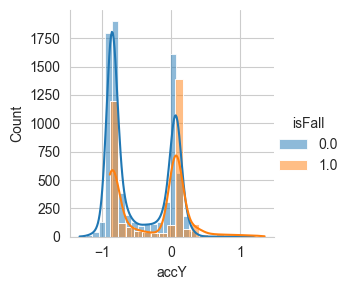

In [16]:
sns.FacetGrid(df, hue = 'isFall').map(sns.histplot, 'accY', kde=True).add_legend()

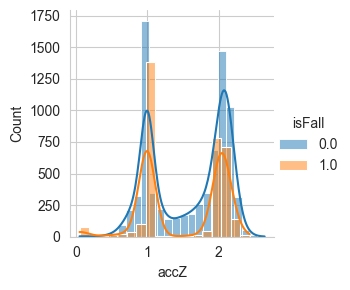

In [17]:
sns.FacetGrid(df, hue = 'isFall').map(sns.histplot, 'accZ', kde=True).add_legend()

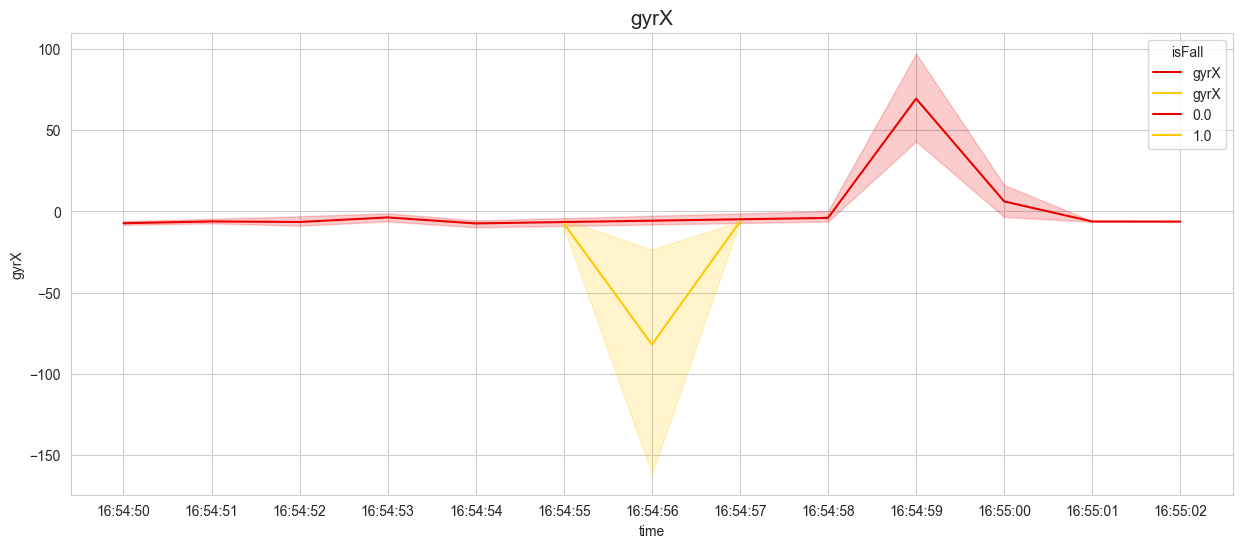

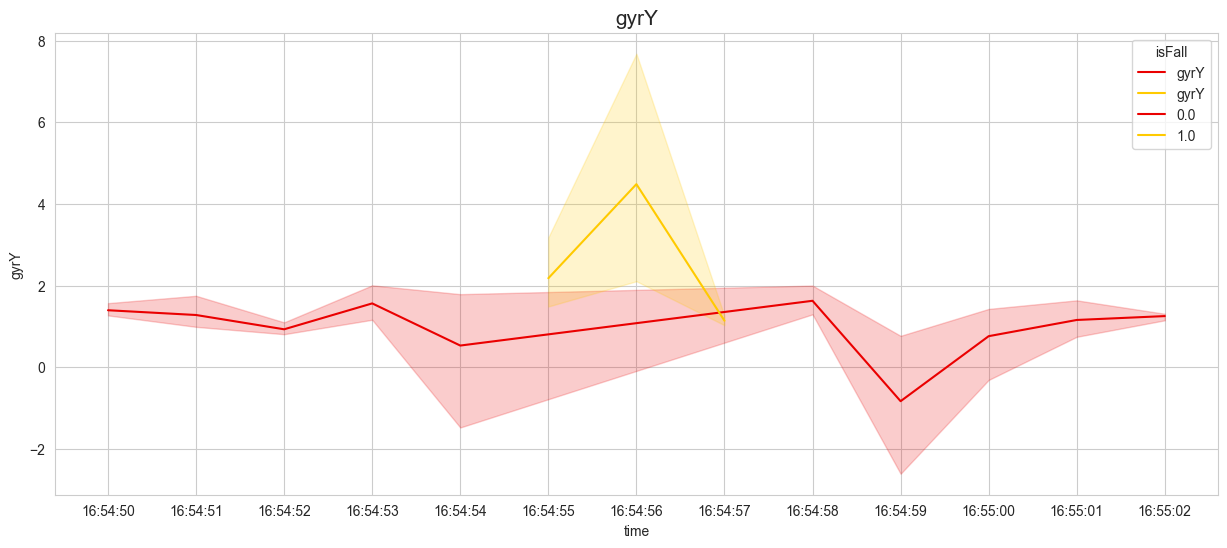

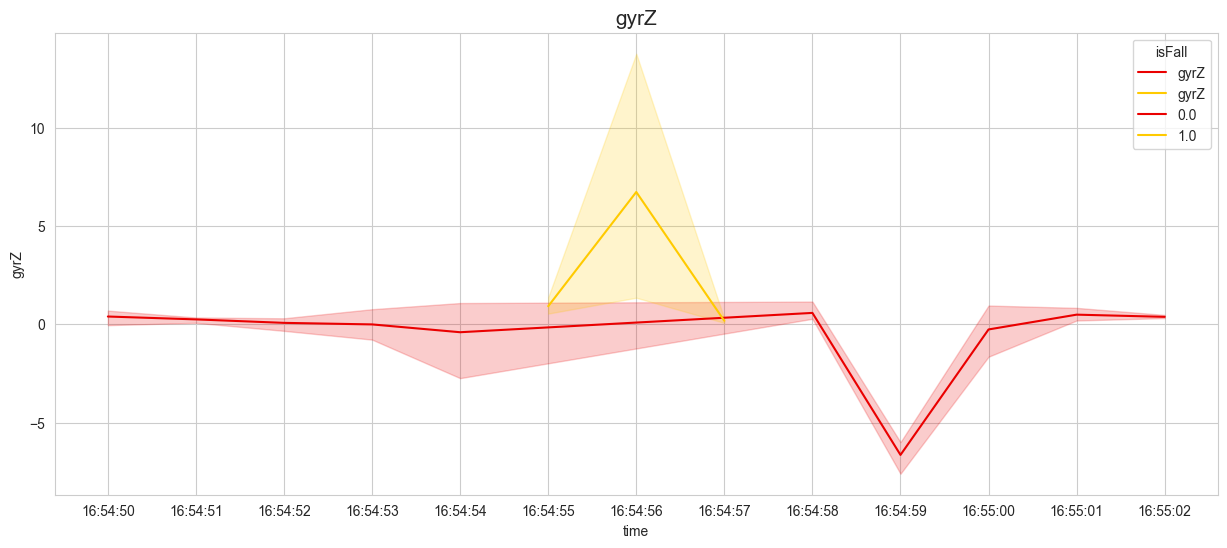

In [9]:
# for i in [0, 1.0]:
#   data = df[df['isFall'] == i]
#   plt.figure(figsize = (15, 6))
#   sns.lineplot(y = 'gyrX', x = 'time', data = data, color='r')
#   sns.lineplot(y = 'gyrY', x = 'time', data = data, color='g')
#   sns.lineplot(y = 'gyrZ', x = 'time', data = data, color='b')
#   plt.legend(['gyrX', 'gyrY', 'gyrZ'])
#   plt.ylabel(i)
#   plt.title(i, fontsize = 15)
#   plt.show()


for metric in ['gyrX', 'gyrY', 'gyrZ']:
    data = df[:60]
    # data = data[data['isFall'] == i]
    plt.figure(figsize = (15, 6))
    sns.lineplot(y = metric, x = 'time', data = data, color='r', label=metric, hue = 'isFall', palette = 'hot')
    plt.ylabel(metric)
    plt.title(metric, fontsize = 15)
    plt.show()

In [37]:
df_p = pd.read_csv('out.csv')

In [38]:
df_p.shape

(1811, 72)

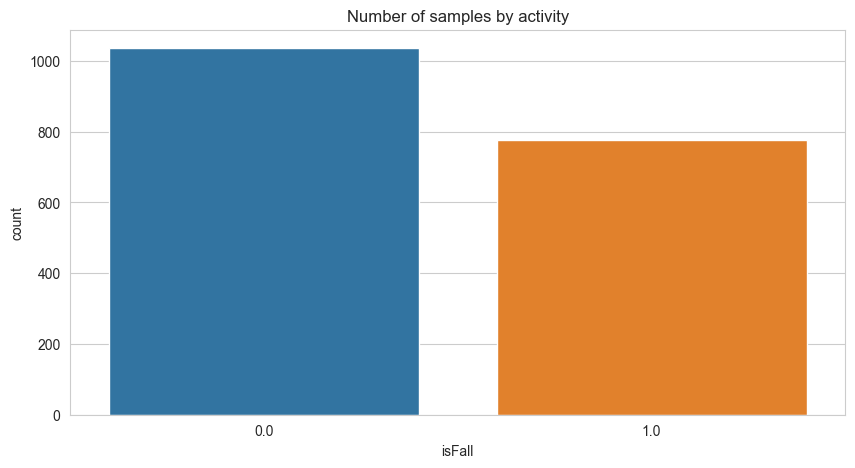

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize = (10, 5))
sns.countplot(x = "isFall", data = df_p)
plt.title("Number of samples by activity")
plt.show()